<h2 style="color:purple">Python Sample Code - Md Mahi Uddin</h2>
<h2 style="color:purple">Logistic Regression</h2>

In [1]:
#import library
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#read the data
df = pd.read_csv("HR_comma_sep.csv")
#see the top
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<h2 style="color:purple">Data details</h2>

In [3]:
#size/shape
left = df[df.left==1]
left.shape

(3571, 10)

In [4]:
retained = df[df.left==0]
retained.shape

(11428, 10)

**Average numbers by group for all** 

In [5]:
#average by group
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,
<ol>
    <li>**Level of Satisfaction**: Satisfaction level look like relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)</li>
    <li>**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)</li>
    <li>**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm </li>
</ol>

**Effect of salary on employee retention**

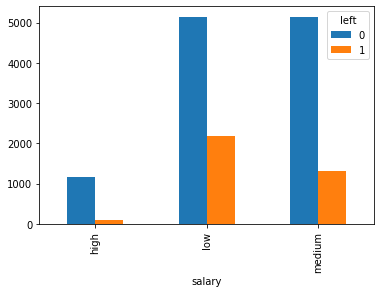

In [6]:
#crosstab analysis
pd.crosstab(df.salary,df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

**Department wise employee retention rate**

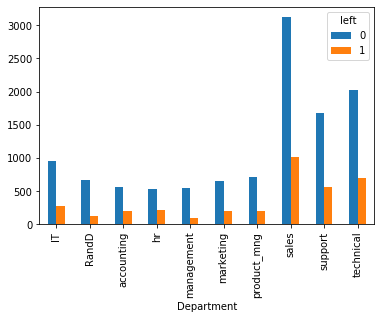

In [7]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

<h3 style="color:purple">From the data analysis so far we can conclude that we will use following variables as independant variables in our model</h3>
<ol>
    <li>**Satisfaction Level**</li>
    <li>**Average Monthly Hours**</li>
    <li>**Promotion Last 5 Years**</li>
    <li>**Salary**</li>
</ol>

In [8]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


**Tackle salary dummy variable**

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

In [9]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [10]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [11]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [12]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [13]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [14]:
y = df.left

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [17]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

**Accuracy of the model**

In [19]:
model.score(X_test,y_test)

0.7765714285714286

In [20]:
#for loop example to automate the data process and generating graphs
#The aim of this short project is to show and save lots of graph in a automated way that will show the cumulative distributed values
#with some interested values

#import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#Mississippi Data
data1 = pd.read_csv('CDFs_automation.csv')
#showing the header of the data
data1

,clu_identi,PPB,CDF
0,feba5778-7376-4e2e-b71a-1c2212549392,0.215754,0.003086
1,D7C1A5C6-C67B-43AB-8561-286D8A458797,0.315476,0.006173
2,AF5B0469-645C-470E-A1FC-C6D64AA85A70,0.363718,0.009259
3,39363505-2cb3-439c-af8c-f82aff90b3e9,0.366464,0.012346
4,01af5440-9d17-4390-ba72-f52550940bc8,0.369437,0.015432
...,...,...,...
319,864A93DE-3CDB-40ED-A6DF-B475CBEC86E1,0.786626,0.987654
320,88901EA0-DA76-4206-B952-18117F63B624,0.794675,0.990741
321,09cb4c9b-9f2a-462b-86f9-6baf615b2a66,0.803447,0.993827
322,AAA3A20A-26DC-48BC-9366-7455820D890B,0.804607,0.996914


In [22]:
#changing the cdf column to make it 100% prob
data1.CDF = data1.CDF*100
print(data1.head())


#work with only 2 rows as we want to see the lowest score rows
df = data1.iloc[0:2]
df
#just copy the dataset to make sure the previous dataset will not harm
data2 = data1

                             clu_identi       PPB       CDF
0  feba5778-7376-4e2e-b71a-1c2212549392  0.215754  0.308642
1  D7C1A5C6-C67B-43AB-8561-286D8A458797  0.315476  0.617284
2  AF5B0469-645C-470E-A1FC-C6D64AA85A70  0.363718  0.925926
3  39363505-2cb3-439c-af8c-f82aff90b3e9  0.366464  1.234568
4  01af5440-9d17-4390-ba72-f52550940bc8  0.369437  1.543210


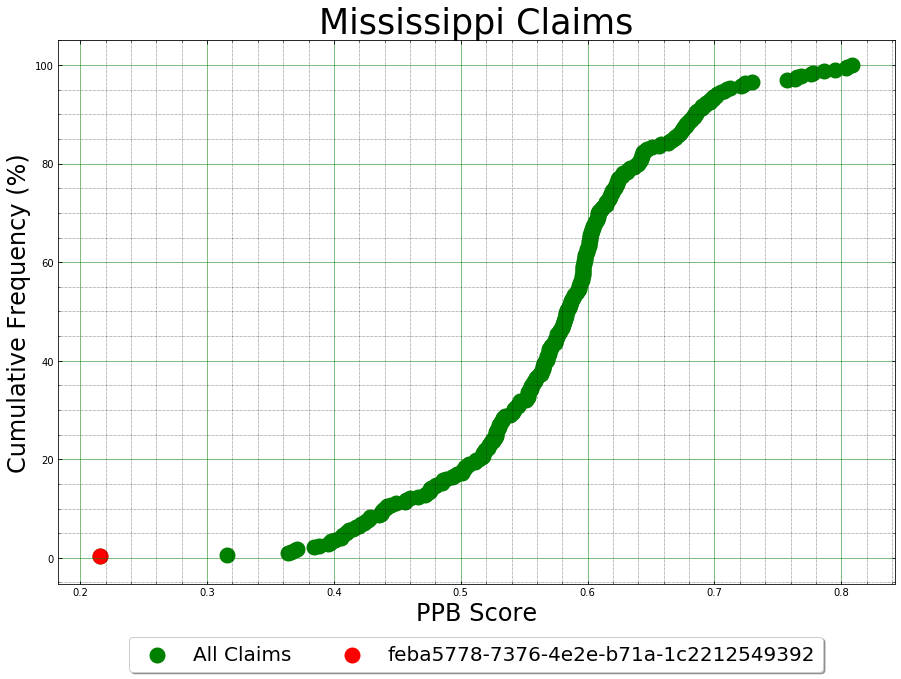

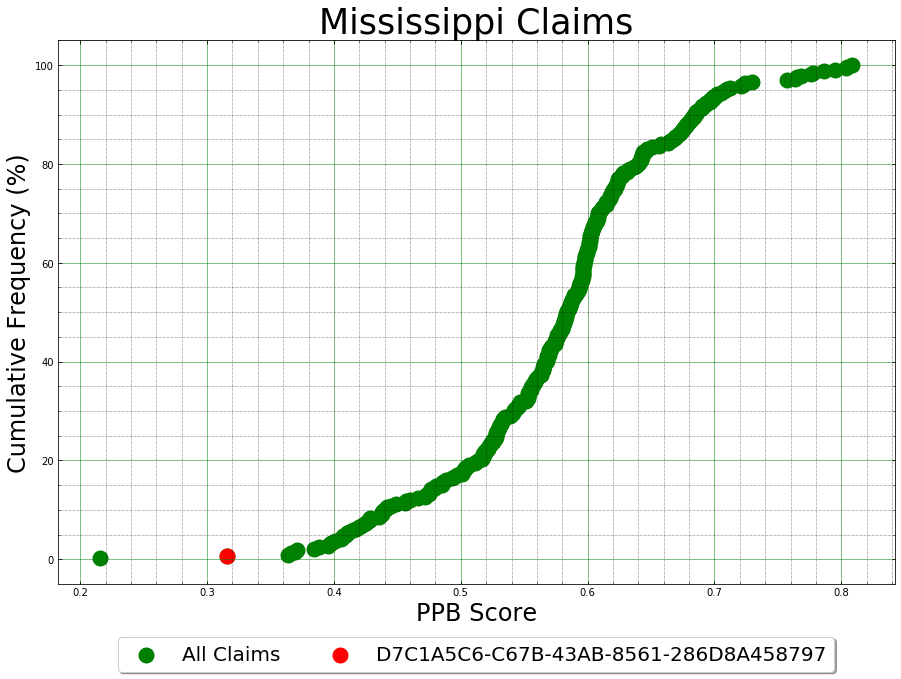

In [23]:
#to save the images in targeted folder
import os
os.getcwd() #get the present directory
os.chdir('Z:/Personnel/Mahi/Mississippi_PPB_20200325/CDF_from_Python') #changing the directory
os.getcwd() #checked it is changed

#the following code almost similar to previous code
#it will simply change the inset title

for i in range(len(df)):
    #draw the plot
    plt.figure(figsize=(15, 10))
    #plt.figure()
    one = plt.scatter(data2['PPB'], data2['CDF'], color='g', linewidth= 10)
    two = plt.scatter(df.loc[i, "PPB"], df.loc[i, "CDF"], color='r', linewidth= 10)
    
    # Turn on the minor TICKS, which are required for the minor GRID
    plt.minorticks_on()
    # Customize the major grid
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    # Customize the minor grid
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.tick_params(which='both', direction='in', top='off', left='off', right='off',bottom='off') #those hypen will stay inside

    plt.xlabel('PPB Score', fontsize=24, color='black')
    plt.ylabel('Cumulative Frequency (%)', fontsize=24, color='black')
    plt.title('Mississippi Claims', fontsize=35, color='black')
    
    plt.legend((one, two), ('All Claims', df.loc[i, "clu_identi"]), fontsize=20, bbox_to_anchor=(0.5, -0.18),loc='lower center', shadow=True, ncol=2)
    
    #name the each image according to their CLU id
    ###plt.savefig(str(df.loc[i, "clu_identi"])+'.jpeg', dpi=96, bbox_inches='tight')
    plt.show